# Cells integration - Nuclei epithelials

In [1]:
import sys

#if branch is stable, will install via pypi, else will install from source
branch = "stable"
IN_COLAB = "google.colab" in sys.modules

if IN_COLAB and branch == "stable":
    !pip install --quiet scvi-tools[tutorials]
elif IN_COLAB and branch != "stable":
    !pip install --quiet --upgrade jsonschema
    !pip install --quiet git+https://github.com/yoseflab/scvi-tools@$branch#egg=scvi-tools[tutorials]

In [2]:
 palette = ["#E31A1C", "#1F78B4", "#A6CEE3",  "#B2DF8A", "#33A02C", "#FB9A99",  "#FDBF6F", "#FF7F00", "#CAB2D6", "#6A3D9A", "#FFFF99", "#B15928", "#66C2A5",
               "#FC8D62", "#8DA0CB", "#B3B3B3", "#A6D854", "#FFD92F", "#E5C494", "#E78AC3",
           '#f90492', '#f7d048', '#098474', '#505ba7', '#927306', '#6a5247']

#### Set up scVI environment

In [3]:
import scvi
import scanpy as sc
import anndata as ad

sc.set_figure_params(figsize=(4, 4))

In [4]:
import pandas as pd 
import numpy as np

# Read in dataset

## Nuclei
### Mareckova

In [5]:
data_dir = '/nfs/team292/lg18/endometriosis/raw_objects/'

nucleiM = sc.read(data_dir+'/nuclei_rawcounts.h5ad')
nucleiM.X.shape

(591721, 33578)

In [6]:
nucleiM = nucleiM[['no' in i for i in nucleiM.obs.discard_lowQC]]
nucleiM.X.shape

(454152, 33578)

In [7]:
meta_barcodes = pd.read_csv('/nfs/team292/lg18/endometriosis/raw_objects/nuclei_Mareckova_barcodeinfo.csv',index_col=0)
# meta_barcodes = meta_barcodes[ meta_barcodes.n_genes > 1500 ]
meta_barcodes = meta_barcodes[ meta_barcodes.total_counts < 150000 ]
meta_barcodes = meta_barcodes[ meta_barcodes.total_counts > 3000 ]

pass_barcodes =  list(set(meta_barcodes.index) & set(nucleiM.obs_names))
print(len(pass_barcodes))
print(len(meta_barcodes.index))

/opt/conda/envs/scvi-singularity/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (15,21,23,24,39,42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


372867
530656


In [8]:
nucleiM = nucleiM[ pass_barcodes ]
print('Total number of cells: {:d}'.format(nucleiM.n_obs))
print('Total number of genes: {:d}'.format(nucleiM.n_vars))
print('Total number of donors: {:d}'.format(len(set(nucleiM.obs.genotype))))
print('Total number of samples: {:d}'.format(len(set(nucleiM.obs['Library_genotype']))))
print('Total number of libraries: {:d}'.format(len(set(nucleiM.obs['library']))))

Total number of cells: 372867
Total number of genes: 33578
Total number of donors: 63
Total number of samples: 68
Total number of libraries: 41


### GarciaAlonso - Luiza

In [9]:
data_dir = '/nfs/team292/lg18/endometriosis/raw_objects/'

nucGarciaAlonso = sc.read(data_dir+'/nuclei_GarciaAlonso_rawcounts.h5ad')
nucGarciaAlonso.X.shape

(35285, 28227)

In [10]:
meta_barcodes = pd.read_csv('/nfs/team292/lg18/endometriosis/raw_objects/nuclei_GarciaAlonso_barcodeinfo.csv',index_col=0)
# meta_barcodes = meta_barcodes[ meta_barcodes.n_genes > 1500 ]
meta_barcodes = meta_barcodes[ meta_barcodes.total_counts < 150000 ]
meta_barcodes = meta_barcodes[ meta_barcodes.total_counts > 3000 ]

pass_barcodes =  list(set(meta_barcodes.index) & set(nucGarciaAlonso.obs_names))
print(len(pass_barcodes))
print(len(meta_barcodes.index))

18680
18874


In [11]:
nucGarciaAlonso = nucGarciaAlonso[ pass_barcodes ]
print('Total number of cells: {:d}'.format(nucGarciaAlonso.n_obs))
print('Total number of genes: {:d}'.format(nucGarciaAlonso.n_vars))
print('Total number of donors: {:d}'.format(len(set(nucGarciaAlonso.obs.genotype))))
print('Total number of samples: {:d}'.format(len(set(nucGarciaAlonso.obs['Library_genotype']))))
print('Total number of libraries: {:d}'.format(len(set(nucGarciaAlonso.obs['library']))))

Total number of cells: 18680
Total number of genes: 28227
Total number of donors: 4
Total number of samples: 7
Total number of libraries: 7


### Merge

In [12]:
nucGarciaAlonso.obs['dataset'] = 'GarciaAlonso_Nuclei'
nucleiM.obs['dataset'] = 'Mareckova_Nuclei'
adata = nucleiM.concatenate([ nucGarciaAlonso], 
                    batch_key = 'dataset', 
                    batch_categories = ['Mareckova_Nuclei', 'GarciaAlonso_Nuclei'], 
                                  join = 'inner')

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


In [13]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
print('Total number of donors: {:d}'.format(len(set(adata.obs.genotype))))
print('Total number of samples: {:d}'.format(len(set(adata.obs['Library_genotype']))))
print('Total number of libraries: {:d}'.format(len(set(adata.obs['library']))))

Total number of cells: 391547
Total number of genes: 28186
Total number of donors: 67
Total number of samples: 75
Total number of libraries: 48


In [14]:
adata = adata[[ i in ['Endo_Superficial', 'Ctrl_Superficial', 'Ctrl_whole_uterus'] for i in adata.obs.Group ]]
adata = adata[[ i not in ['Myometrium'] for i in adata.obs.Tissue ]]

print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
print('Total number of donors: {:d}'.format(len(set(adata.obs.genotype))))
print('Total number of samples: {:d}'.format(len(set(adata.obs['Library_genotype']))))
print('Total number of libraries: {:d}'.format(len(set(adata.obs['library']))))

Total number of cells: 391547
Total number of genes: 28186
Total number of donors: 67
Total number of samples: 75
Total number of libraries: 48


## Subset to epithelials

In [15]:
annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/nuclei_endometrium.csv',index_col=0)
# annot_df.index = [ a.replace('-'+b, '') for a, b in zip(annot_df.index, annot_df.Type.tolist())]
annot_df.head()

annot = annot_df['Nuc_celltype'].to_dict()
adata.obs['Nuc_celltype'] = adata.obs_names.map(annot)
print(adata.obs['Nuc_celltype'].value_counts())

# del annot_df

/opt/conda/envs/scvi-singularity/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (15,19,21,22,23,24,25,38,41,42,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
Trying to set attribute `.obs` of view, copying.


Mesen_eS                74956
Mesen_dS                41927
Epi_Prolif              41728
Immune                  37725
Epi_Glands              32726
Epi_P4                  27628
Doublet                 26322
Mesen_eS_MMPs           21618
Epi_Hormones            12844
Epi_Lumen               10733
Epi_Prolif_SOX9_LGR5    10387
Epi_Prolif_cycling      10043
Epi_MUC5B                9659
Epi_Prolif_SOX9_CDH2     8973
Endothelial              6761
Mesen_eS_cycling         6760
Epi_Ciliated             3335
Unknwonw                 2709
Mesen_SMCs               2479
Mesen_PV                 2160
Mesen_FibroC7              74
Name: Nuc_celltype, dtype: int64


In [16]:
adata = adata[[ 'Epi' in str(i) for i in  adata.obs['Nuc_celltype'] ]]
print(adata.obs['Nuc_celltype'].value_counts())

Epi_Prolif              41728
Epi_Glands              32726
Epi_P4                  27628
Epi_Hormones            12844
Epi_Lumen               10733
Epi_Prolif_SOX9_LGR5    10387
Epi_Prolif_cycling      10043
Epi_MUC5B                9659
Epi_Prolif_SOX9_CDH2     8973
Epi_Ciliated             3335
Name: Nuc_celltype, dtype: int64


In [17]:
annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/nuclei_epithelials_endometrium.csv',index_col=0)
annot_df.head()

annot = annot_df['Nuc_epi_celltype'].to_dict()
adata.obs['Nuc_epi_celltype'] = adata.obs_names.map(annot)
print(adata.obs['Nuc_epi_celltype'].value_counts())

/opt/conda/envs/scvi-singularity/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
Trying to set attribute `.obs` of view, copying.


Prolif                   38508
Glandular_a_WOI          18513
Doublet                  14439
P4                       13434
Glandular_b_secretory    12553
Prolif_cycling           10488
Hormones                  9651
MUC5B                     9343
Lumen_c                   7779
Prolif_SOX9_LGR5          6614
P4_cycling                6417
LowQC                     5526
Lumen_a                   3800
Prolif_SOX9_CDH2          3800
Lumen_b                   3703
Ciliated                  3181
Lumen_d                    307
Name: Nuc_epi_celltype, dtype: int64


In [18]:
adata = adata[[ i not in ['LowQC', 'Doublet']  for i in  adata.obs['Nuc_epi_celltype'] ]]
print(adata.obs['Nuc_epi_celltype'].value_counts())

Prolif                   38508
Glandular_a_WOI          18513
P4                       13434
Glandular_b_secretory    12553
Prolif_cycling           10488
Hormones                  9651
MUC5B                     9343
Lumen_c                   7779
Prolif_SOX9_LGR5          6614
P4_cycling                6417
Lumen_a                   3800
Prolif_SOX9_CDH2          3800
Lumen_b                   3703
Ciliated                  3181
Lumen_d                    307
Name: Nuc_epi_celltype, dtype: int64


## Identify HVGs - on each dataset independently

!!! Unlike before (at least I think), now they recommend subsetting to highly variable genes before running scVI 

--> the tutorial says anywhere in between 1000 and 10,000 should be fine, so I arbitrarily chose 2000

In [19]:
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=2000,
    subset=False,
    flavor="seurat_v3",
    batch_key="dataset"
)

Trying to set attribute `.uns` of view, copying.
/opt/conda/envs/scvi-singularity/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:158: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.var['highly_variable'] = df['highly_variable'].values
/opt/conda/envs/scvi-singularity/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:159: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.var['highly_variable_rank'] = df['highly_variable_rank'].values
/opt/conda/envs/scvi-singularity/li

In [20]:
# intersect independent HVGs
# hvg_Mareckova = cellsMareckova.var['highly_variable'].tolist()
# hvg_Tan = cellsTan.var['highly_variable'].tolist()

# hvg_both = [all(tup) for tup in zip(hvg_Mareckova, hvg_Tan)]
# sum(hvg_both)

In [21]:
# use HVGs computed by "dataset"
hvg_both = adata.var['highly_variable'].tolist()
sum(hvg_both)

2000

In [22]:
# subset object for scVI
bdata = adata[:, hvg_both ]
bdata.layers["counts"] = bdata.X.copy() # preserve counts

In [23]:
print('Total number of highly_variable genes: {:d}'.format(bdata.n_vars))

Total number of highly_variable genes: 2000


## Normalize - optional

In [24]:
# sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
# sc.pp.log1p(adata)

## scVI

!!! Here you can specify your covariates you want to correct for

In [25]:
# scvi.data.setup_anndata(
#     bdata,
#     layer="counts",
#     batch_key='genotype',
#     categorical_covariate_keys=['dataset', "Type", 'sample']
# )

scvi.data.setup_anndata(
    bdata,
    layer="counts",
    batch_key='dataset',
    categorical_covariate_keys=[ "genotype"]
)

INFO     Using batches from adata.obs["dataset"]                                             
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.layers["counts"]                                              
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 148091 cells, 2000 vars, 2        
         batches, 1 labels, and 0 proteins. Also registered 1 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


In [26]:
# model = scvi.model.SCVI(bdata, n_latent= 64, n_layers=2, gene_likelihood="nb")
model = scvi.model.SCVI(bdata, n_latent= 64, n_layers=1)

In [27]:
model

SCVI Model with the following params: 
n_hidden: 128, n_latent: 64, n_layers: 1, dropout_rate: 0.1, dispersion: gene, 
gene_likelihood: zinb, latent_distribution: normal
Training status: Not Trained

To print summary of associated AnnData, use: scvi.data.view_anndata_setup(model.adata)

In [28]:
model.train() #max_epochs = 400

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 54/54: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 54/54 [09:18<00:00, 10.34s/it, loss=1.11e+03, v_num=1]


In [29]:
latent = model.get_latent_representation()

In [30]:
adata.obsm["X_scVI"] = latent

## Save latent space

In [31]:
# del adata.obs['is_doublet']
# pd.DataFrame(adata.obsm["X_scVI"]).to_csv(data_dir+'/cells_nuclei_rawcounts_scVI_latentspace.csv')
# adata.write('/nfs/team292/datasets/hugodeca/integrated_female.h5ad')

### Visualization and Clustering

In [32]:
# use scVI latent space for UMAP generation
sc.pp.neighbors(adata, use_rep="X_scVI")
sc.tl.umap(adata, min_dist=0.4)

/opt/conda/envs/scvi-singularity/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'sample' as categorical
/opt/conda/envs/scvi-singularity/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'library' as categorical
/opt/conda/envs/scvi-singularity/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed

... storing 'Library_genotype' as categorical
/opt/conda/envs/scvi-singularity/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Group' as categorical
/opt/conda/envs/scvi-singularity/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Endometriosis_stage' as categorical
/opt/conda/envs/scvi-singularity/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categor

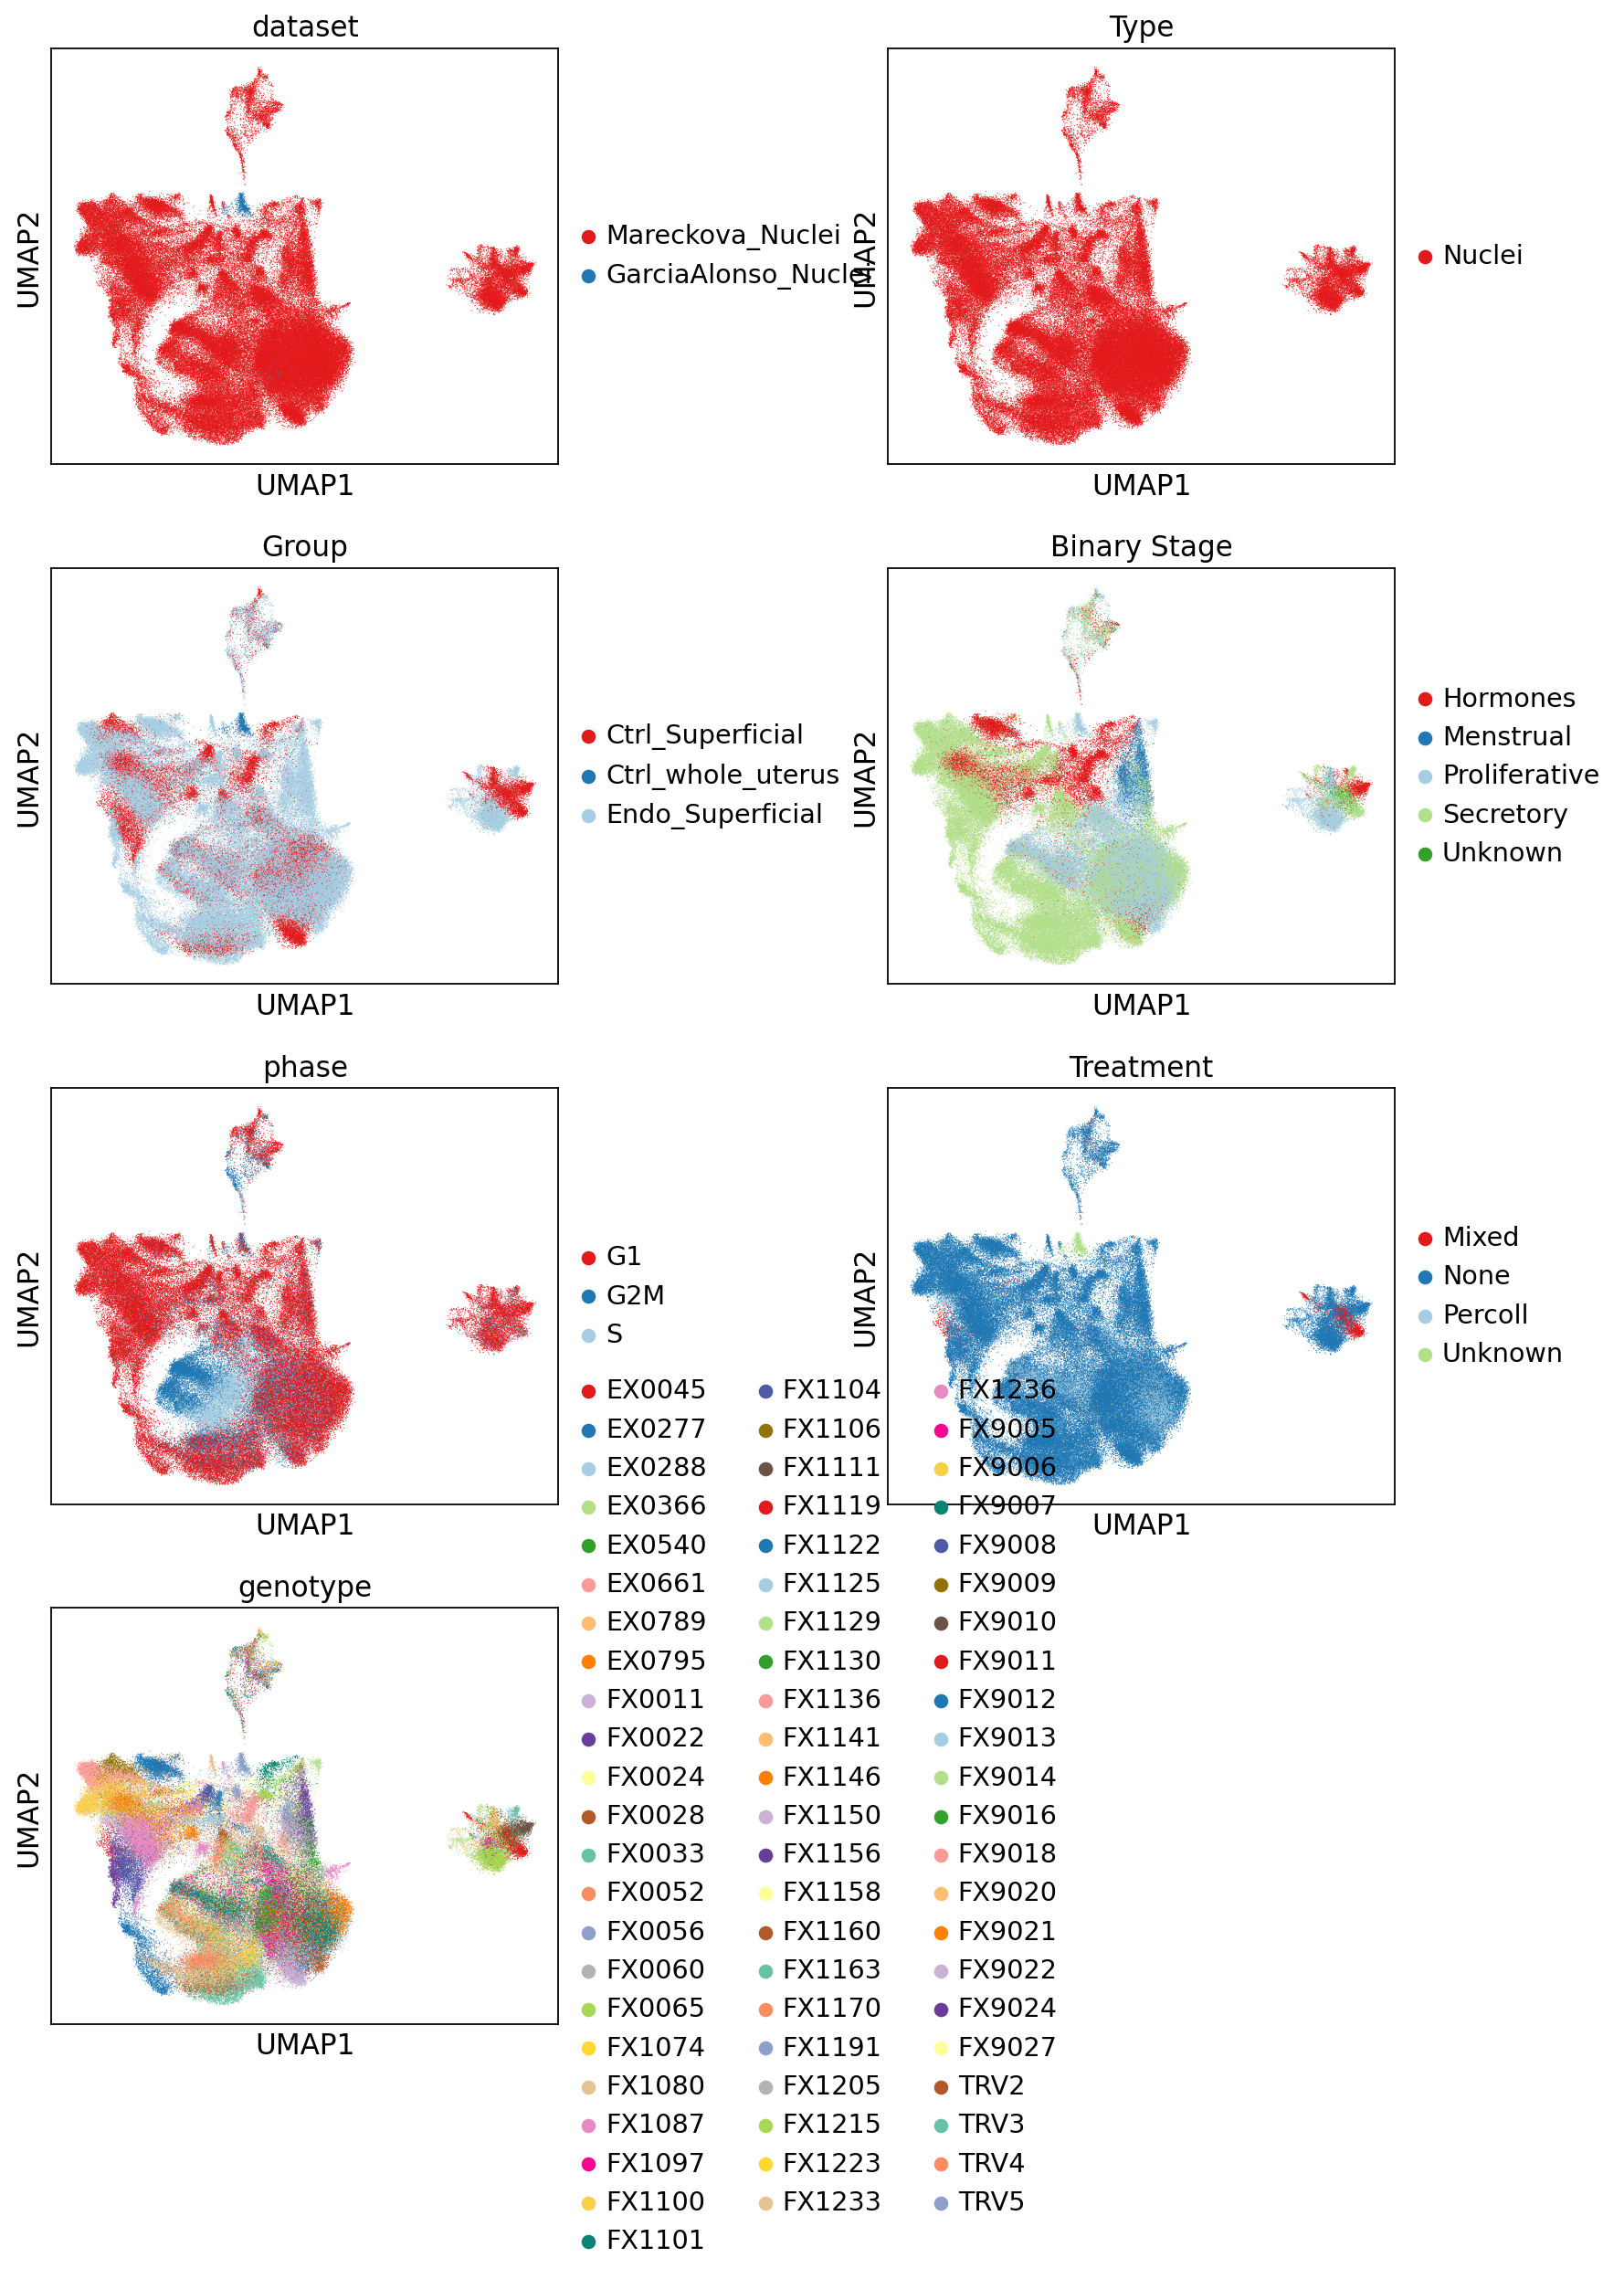

In [33]:
sc.pl.umap(
    sc.pp.subsample(adata, fraction=1, copy=True),
    color=['dataset', 'Type',  'Group', "Binary Stage", "phase", 'Treatment',  'genotype'], 
    palette = palette,
    frameon=True, ncols = 2, wspace = 0.5
)

In [34]:
annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/labelTransfer_cell2nuc/epithelial/transferred_labels.csv',index_col=0)
annot_df.head()
annot_epi = annot_df['classifier'].to_dict()


annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/labelTransfer_cell2nuc/mesenchymal/transferred_labels.csv',index_col=0)
annot_df.head()
annot_mesen = annot_df['classifier'].to_dict()

annot = dict(annot_epi)
annot.update(annot_mesen)


adata.obs['LT_celltype'] = adata.obs_names.map(annot)
print(adata.obs['LT_celltype'].value_counts())

adata.obs['LT_epi_celltype'] = adata.obs_names.map(annot_epi)
print(adata.obs['LT_epi_celltype'].value_counts())

adata.obs['LT_mesen_celltype'] = adata.obs_names.map(annot_mesen)
print(adata.obs['LT_mesen_celltype'].value_counts())

Prolif                   37534
Glandular_b_secretory    18920
P4_induced               14199
Prolif_SOX9_CDH2         12375
Hormones                 11994
Glandular_a_WOI          10564
MUC5B                     8909
Lumen_a                   8615
Lumen_b                   7703
Prolif_SOX9_LGR5          5713
Lumen_c                   4401
Doublet                   3492
Ciliated                  3377
Glandular_c_FGF7           151
KRT5                        46
Name: LT_celltype, dtype: int64
Prolif                   37534
Glandular_b_secretory    18920
P4_induced               14199
Prolif_SOX9_CDH2         12375
Hormones                 11994
Glandular_a_WOI          10564
MUC5B                     8909
Lumen_a                   8615
Lumen_b                   7703
Prolif_SOX9_LGR5          5713
Lumen_c                   4401
Doublet                   3492
Ciliated                  3377
Glandular_c_FGF7           151
KRT5                        46
Name: LT_epi_celltype, dtype: int64
Se

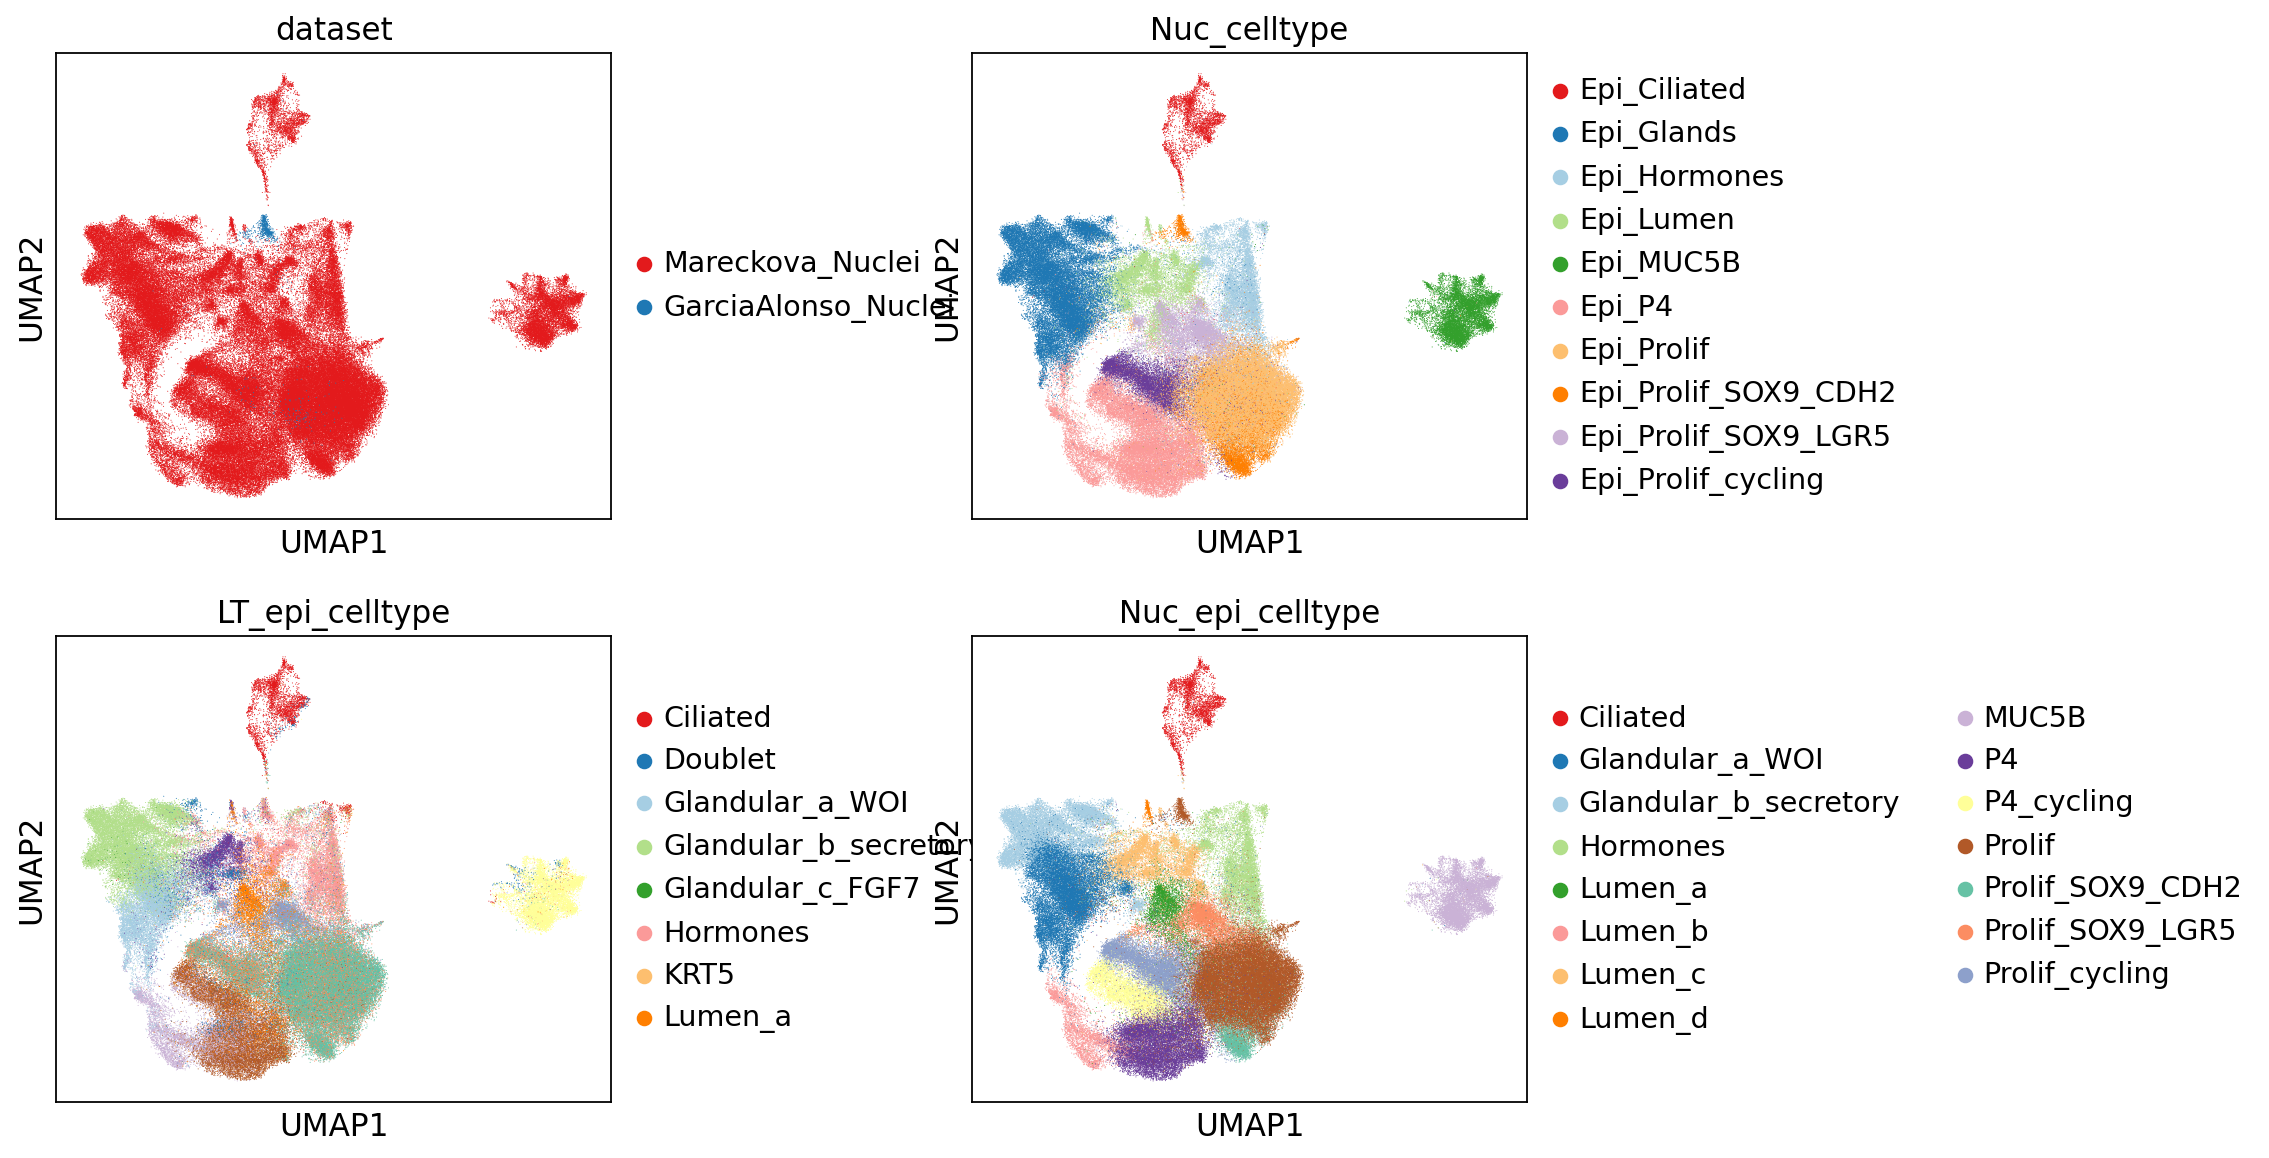

In [36]:
sc.pl.umap(
    adata,
    color=['dataset',  'Nuc_celltype', 'LT_epi_celltype', 'Nuc_epi_celltype'], 
    palette = palette,
    frameon=True, ncols = 2, wspace = 0.5
)

In [37]:
# sc.pl.umap(adata, color=["EPCAM", "PAX8", 'LGR5', 'FOXJ1', 'TP73', "DCN", "PDGFRA",  "MYH11",
#                          "PDGFRB", 'PTPRC', 'CDH5', 'HBA1', 'PAEP'], color_map='OrRd')

In [38]:
for i in adata.var.columns.tolist():
    if 'Nuclei' in i:
        print(i)
        del adata.var[i]
    if 'Cells' in i:
        print(i)
        del adata.var[i]

gene_ids-0-GarciaAlonso_Nuclei
feature_types-0-GarciaAlonso_Nuclei
n_cells-0-GarciaAlonso_Nuclei
gene_ids-1-GarciaAlonso_Nuclei
feature_types-1-GarciaAlonso_Nuclei
n_cells-1-GarciaAlonso_Nuclei
gene_ids-2-GarciaAlonso_Nuclei
feature_types-2-GarciaAlonso_Nuclei
n_cells-2-GarciaAlonso_Nuclei
gene_ids-3-GarciaAlonso_Nuclei
feature_types-3-GarciaAlonso_Nuclei
n_cells-3-GarciaAlonso_Nuclei
gene_ids-4-GarciaAlonso_Nuclei
feature_types-4-GarciaAlonso_Nuclei
n_cells-4-GarciaAlonso_Nuclei
gene_ids-5-GarciaAlonso_Nuclei
feature_types-5-GarciaAlonso_Nuclei
n_cells-5-GarciaAlonso_Nuclei
gene_ids-6-GarciaAlonso_Nuclei
feature_types-6-GarciaAlonso_Nuclei
n_cells-6-GarciaAlonso_Nuclei
n_cells_by_counts-GarciaAlonso_Nuclei
mean_counts-GarciaAlonso_Nuclei
pct_dropout_by_counts-GarciaAlonso_Nuclei
total_counts-GarciaAlonso_Nuclei
n_cells-GarciaAlonso_Nuclei
gene_ids-0-Mareckova_Nuclei
feature_types-0-Mareckova_Nuclei
n_cells-0-Mareckova_Nuclei
gene_ids-1-Mareckova_Nuclei
feature_types-1-Mareckova_Nuclei

In [39]:
adata.write('/nfs/team292/lg18/endometriosis/integrated_objects/nuclei_epithelials_CLEAN_integrated.h5ad')